In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import pareto

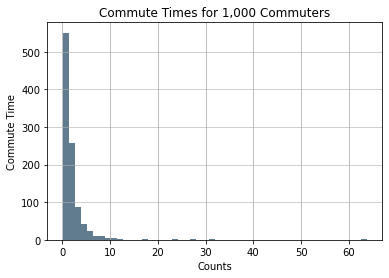

In [73]:
size, scale = 1000, 2
somme = pd.Series(np.random.pareto(scale, size=size) + np.random.pareto(scale, size=size))
pareto = pd.Series(np.random.pareto(scale, size=size))
somme.plot.hist(grid=True, bins=50, rwidth=1,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)

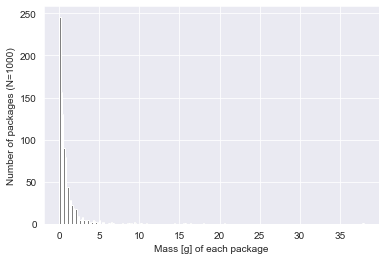

In [109]:
N = 1000
d = np.random.pareto(2, size=N)
plt.hist(d, color="grey", bins='auto')
plt.xlabel("Mass [g] of each package")
plt.ylabel("Number of packages (N={})".format(N))
plt.show()

In [113]:
d.sort(

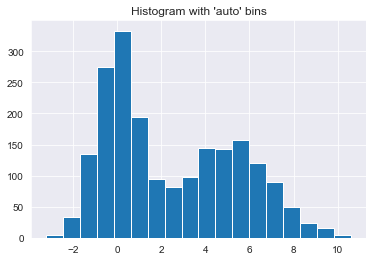

In [115]:

rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000),
               rng.normal(loc=5, scale=2, size=1000)))
_ = plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [124]:
hist, bin_edges = np.histogram(a, bins='auto',density=True)
print(bin_edges)

[-3.20440134 -2.43824952 -1.67209769 -0.90594587 -0.13979404  0.62635779
  1.39250961  2.15866144  2.92481326  3.69096509  4.45711692  5.22326874
  5.98942057  6.75557239  7.52172422  8.28787605  9.05402787  9.8201797
 10.58633152]


In [123]:
np.sum(hist * np.diff(bin_edges))

1.0

In [139]:
N = 1000
d = np.random.pareto(2, size=N)
hist, bin_edges = np.histogram(d,bins=1000, density = True)

In [140]:
np.sum(hist*np.diff(bin_edges))

1.0

### Test de convergence de P(X_1 + X_2 > t) / P(X_1 > t) vers 2 

In [ ]:
def get_Int(bin_edges, t): # Retourne l'indice du premier bord de bin dont la réalisation est au dessus de t
    nb = len(bin_edges)
    i = 0
    done = 0
    if t>bin_edges[-1]:
        print("aucune réalisation suppérieure à t")
    if t <= bin_edges[-1]:
        while done == 0 :
            if bin_edges[i] < t: 
                i = i + 1
            if bin_edges[i] > t:
                done = 1 
    return i 

In [ ]:
def calc_Prob(t, hist, bin_edges): #Calcule P(X>t)
    return np.sum(hist[t:]*np.diff(bin_edges[t:]))

In [2]:
N = 100000000
X_1 = np.random.pareto(2, size=N)
X_2 = np.random.pareto(2, size=N)
hist, bin_edges = np.histogram(X_1+X_2,bins=1000, density = True)

In [3]:
X_3 = np.random.pareto(2, size=N)
hist_1, bin_edges_1 = np.histogram(X_3,bins=1000, density = True)

In [28]:
Tfin = 2000

In [29]:
P = np.zeros(Tfin)
for t in range(1,Tfin,1):
    P_Somme = calc_Prob(get_Int(bin_edges,t), hist, bin_edges)
    P_X3 =  calc_Prob(get_Int(bin_edges_1,t), hist_1, bin_edges_1)
    P[t] = P_Somme/P_X3
    

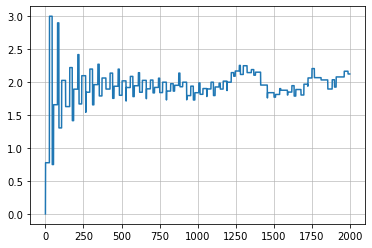

In [30]:
plt.plot(P)
plt.grid( alpha=0.75)

### Estimation Empirique du Coeff. de Crammer Lundberg

In [96]:
def estime_Esp(loi = 1 , NbVar = 100000, param_W = 2, Nb_Cycles = 10, inter = 10,c = 1):
    W = np.random.exponential(param_W, size=NbVar)
    first = 0
    last = first + inter
    if loi == 0: 
        X = np.random.exponential(2, size=NbVar)
    
    if loi == 1:
        X = np.random.uniform(size=NbVar)
        
    if loi == 2:
        X = np.abs(np.random.normal(0,1,size=NbVar))
    
    def search(first, last):
        K = np.linspace(first, last,last-first )
        NbK = last - first
        for i in range(NbK):
            somme = 0
            for j in range(NbVar):
                somme = np.exp(K[i]*(X[j] - c*W[j]))
            K[i] = somme/NbVar
        return K
    
    def one_in(K):
        new_first = 0
        new_last = 1
        for i in range(len(K)-1):
            if K[i]<1 and K[i+1]> 1: 
                new_first = i 
                new_last = i+1
            else :
                new_first = len(K)
                new_last = len(K)+inter
        return new_first, new_last
    
    if Nb_Cycles == 1:
        return search(first,last)
    
    if Nb_Cycles > 1:
        for i in range(Nb_Cycles):
            K = search(first,last)
            first,last = one_in(K)   
            return K
        
    else : return Null
    

        

In [146]:
def estime_Esp1(loi = 1 , NbVar = 1000000, param_W = 2, first = 0, last = 2, inter=10, c = 2):
    W = np.random.exponential(param_W, size=NbVar)
    if loi == 0: 
        X = np.random.exponential(2, size=NbVar)
    
    if loi == 1:
        X = np.random.uniform(size=NbVar)
        
    if loi == 2:
        X = np.abs(np.random.normal(0,1,size=NbVar))
    

    K = np.linspace(first, last, inter )
    K2 = np.zeros(inter)
    for i in range(inter):
        somme = 0
        for j in range(NbVar):
            somme = somme + np.exp(K[i]*(X[j] - c*W[j]))
        K2[i] = somme/NbVar
    plt.plot(K, K2)



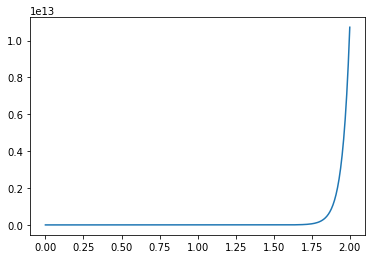

In [154]:
estime_Esp1(loi = 0 , NbVar = 100000, param_W = 2, first = 0, last = 2, inter=200, c = 2)